# CS251 Machine Learning Project

### Table of contents: 
* [Data Description](#Data-Description)
* [Data Preparation](#Data-Preparation)
    * [Importing the necessary libraries](#imports)
* [Dimensionality Reduction](#Dimensionality-Reduction)
* [Classical Algorithms](#Classical-Algorithms)
    * [Logistic Regression](#Logistic-Regression)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    * [Support Vector Machine](#Support-Vector-Machine)
    * [Decision Tree](#Decision-Tree)
* [Ensemble Methods](#Ensemble-Methods)
    * [Gradient Boosting](#Gradient-Boosting)
    * [Stacking](#Stacking)
* [Comparison](#Comparison)

## Data Description <a class="anchor" id="Data-Description"></a>

### Gene Expression Data
This dataset includes gene expression levels from colorectal cancer samples. <br>
Here are the main details: <br>
**Data structure:** <It consists of 1,935 rows and 64 columns. <br>
**Columns:** ID_REF: It provides gene IDs, indicating that each row corresponds to a certain gene. <br>
**Additional columns (GSM877126, GSM877127, etc.):** These are most likely microarray sample identifiers that indicate  the gene expression level for each sample as given in ID_REF. Most likely, the numbers represent normalised expression values. <br>
**Purpose:** Gene expression databases are commonly used to analyse gene activity across different situations or therapies, assisting in determining which genes are upregulated or downregulated in cancer vs normal settings, or throughout different stages of cancer.This dataset includes gene expression levels from colorectal cancer samples. <br>
### Patient Data
This dataset focuses on the clinical and demographic features of the patients from whose the samples were collected. <br>
It's organised as follows: <br>
The data structure matches the gene expression data in terms of number of entries, indicating a potential  one-to-one relationship at the sample level with the appropriate connecting field. <br>
**Columns:** ID_REF: This dataset contains sample IDs (e.g., GSM877126), which should match the samples in the gene expression data. <br>
**Age (in years):** Patients' age. <br>
**Dukes:** The stage of colorectal cancer according to Duke's classification, a popular approach for describing how far cancer has progressed.
**Gender:** Patients' gender. <br>
**Location:** The location of the cancer within the colon. <br>
**Disease-free survival (DFS):** A clinical outcome that measures the amount of time following therapy when no indications of malignancy are detected. <br>
**DFS event:** A binary indication (0 or 1), with 1 indicating the recurrence of cancer or an associated adverse event. <br>
**Adj_Radio:** A binary indication indicating whether the patient got radiation. <br>
**Adj_Chem:** A binary indication indicating whether or not the patient got chemotherapy.

## Data Preparation <a class="anchor" id="Data-Preparation"></a>

## Importing the necessary libraries <a class="anchor" id="imports"></a>

In [1]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
# Loading the gene expression data
gene_expression_path = 'data/Colorectal Cancer Gene Expression Data.csv'
gene_expression_data = pd.read_csv(gene_expression_path)

# Loading the patient data
patient_data_path = 'data/Colorectal Cancer Patient Data.csv'
patient_data = pd.read_csv(patient_data_path)

In [3]:
# Displaying the first few rows and summary information of the gene expression data
print("Gene Expression Data:")
print(gene_expression_data.head())

Gene Expression Data:
   Unnamed: 0     ID_REF  GSM877126  GSM877127  GSM877128  GSM877129  \
0           0     117_at   6.029834   6.344321   5.023127   4.612727   
1           1  1007_s_at   9.468893   9.994204  10.409823  10.596921   
2           2    1053_at   7.187090   7.705626   7.934057   7.446374   
3           3     121_at   6.807582   6.893130   7.165602   7.071417   
4           4  1255_g_at   3.084591   3.118704   2.984632   2.912851   

   GSM877130  GSM877131  GSM877132  GSM877133  ...  GSM877179  GSM877180  \
0   5.865944   6.863884   5.430316   4.285183  ...   5.111097   4.894901   
1  10.252547   9.671754  10.863276   9.788300  ...  10.084649  10.353849   
2   7.141105   7.040535   7.767728   8.035921  ...   6.119306   7.320403   
3   7.103383   7.504727   7.067674   7.259019  ...   7.267976   7.556417   
4   3.383726   2.772535   3.037304   2.986420  ...   2.741116   3.054084   

   GSM877181  GSM877182  GSM877183  GSM877184  GSM877185  GSM877186  \
0   6.660386   5.

In [4]:
print(gene_expression_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1935 non-null   int64  
 1   ID_REF      1935 non-null   object 
 2   GSM877126   1935 non-null   float64
 3   GSM877127   1935 non-null   float64
 4   GSM877128   1935 non-null   float64
 5   GSM877129   1935 non-null   float64
 6   GSM877130   1935 non-null   float64
 7   GSM877131   1935 non-null   float64
 8   GSM877132   1935 non-null   float64
 9   GSM877133   1935 non-null   float64
 10  GSM877134   1935 non-null   float64
 11  GSM877135   1935 non-null   float64
 12  GSM877136   1935 non-null   float64
 13  GSM877137   1935 non-null   float64
 14  GSM877138   1935 non-null   float64
 15  GSM877139   1935 non-null   float64
 16  GSM877140   1935 non-null   float64
 17  GSM877141   1935 non-null   float64
 18  GSM877142   1935 non-null   float64
 19  GSM877143   1935 non-null  

In [5]:
# Displaying the first few rows and summary information of the patient data
print("Patient Data:")
print(patient_data.head())
print(patient_data.info())

Patient Data:
   Unnamed: 0     ID_REF  Age (in years) Dukes Stage  Gender Location  \
0           0  GSM877126            62.0           A    Male     Left   
1           1  GSM877127            77.0           B    Male     Left   
2           2  GSM877128            66.0           C  Female     Left   
3           3  GSM877129            72.0           D  Female     Left   
4           4  GSM877130            75.0           C    Male     Left   

   DFS (in months)  DFS event  Adj_Radio  Adj_Chem  
0            108.0        0.0        1.0       0.0  
1             40.0        1.0        1.0       0.0  
2             49.0        0.0        1.0       0.0  
3             45.0        0.0        1.0       1.0  
4             40.0        0.0        0.0       1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       63 non-null 

In [6]:
# Checking for and handling missing values in both datasets
gene_expression_data = gene_expression_data.dropna()  # Dropping rows with missing data
patient_data = patient_data.dropna()

# Removing any unnecessary columns (e.g., 'Unnamed: 0' if it's an index)
gene_expression_data.drop('Unnamed: 0', axis=1, inplace=True)
patient_data.drop('Unnamed: 0', axis=1, inplace=True)

# Convert categorical data into a format suitable for ML (one-hot encoding for 'Gender', 'Location', 'Dukes Stage')
#patient_data = pd.get_dummies(patient_data, columns=['Dukes Stage', 'Gender', 'Location'])
#print(patient_data.head())
# Whether or not do the patiens match in two data, so that we know if we can incorporate one data with another 

print(gene_expression_data.columns[1:] == patient_data['ID_REF'].unique())

# we can see that all the values match, so we can continue our analysis by knowing the stage of disease and other 
#features of their while gene expression analysis 

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


## Dimensionality Reduction <a class="anchor" id="Dimensionality-Reduction"></a>

In [7]:
# We will try to reduce the dimensionally of the data by using two ways and then comparing those with each other. We
# searched through the internet and found out that for reduction the dimensionality of gene expression data the main ways are PCA and 
# UMAP, thus we will concentrate on these two. 
gene_expression_filtered = gene_expression_data.drop(columns=['ID_REF'])  # Removing non-expression columns

scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression_filtered)

pca = PCA(n_components=2)
X = pca.fit(gene_expression_scaled).transform(gene_expression_scaled)
print(pca.explained_variance_ratio_)

# the results indicate that the first principal component alone captures approximately 93.95% of the variance in 
# the data, while the second component captures only about 0.73%. This suggests that the first component is highly 
# dominant, potentially simplifying the analysis as it implies that most of the information in the dataset can be 
# represented in a single dimension.

[0.93946638 0.00726572]


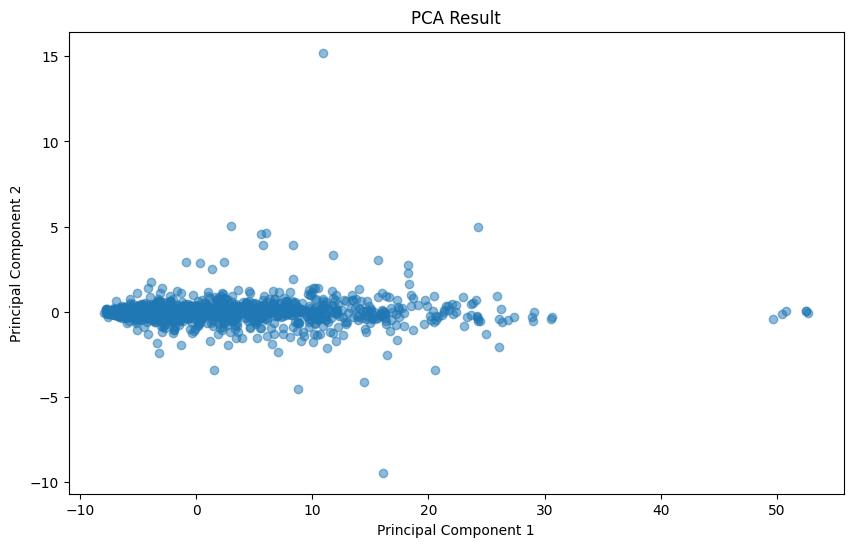

In [8]:
# Visualizing the PCA results 

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# the plot suggests that most data points are clustered around a region close to zero on Principal Component 2,
# with Principal Component 1 displaying a wider spread. This is consistent with the explained variance ratio provided earlier

In [ ]:
# We will also do UMAP dimensionality reduction and try to compare the different approaches. 
# Perform UMAP dimensionality reduction
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(gene_expression_scaled)

# Plot the UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5)
plt.title('UMAP Result')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

# The UMAP visualization displays a clear curved structure, indicating a non-linear relationship within the data. 
# The dense areas could represent groups or stages of a variable, such as disease progression, and the isolated 
# points may be outliers. Overlaying additional data could provide further biological or clinical insights.

Now, let's compare these two ways.<br> 
**PCA:** Given that PCA captured a significant amount of variance in just one component, it's excellent for reducing complexity and identifying the main axis of variation in the data. If our goal was to simplify the dataset and reduce noise, PCA would be very effective. However, the PCA plot didn't show clear clusters, which might be important for interpretation in a biological context. <br>
**UMAP:** The UMAP visualization revealed a more complex, non-linear structure, which could correspond to meaningful biological patterns not captured by PCA. So, UMAP might be more insightful. We will choose UMAP for this analysis. 

In [ ]:
# Now, we will try to integrate the patient data with the gene expression data to get a merged data that will provide 
# more insights. We will first of all transpose the data, so that the ID_REF is a column not a row

gene_expression_data = gene_expression_data.transpose()
print(gene_expression_data.head())

In [ ]:
col_names = gene_expression_data.iloc[0].tolist()
gene_expression_data.columns = col_names
gene_expression_data = gene_expression_data.drop(axis=0, index='ID_REF') # after which we can drop the ID_REF which is no longer needed 

In [ ]:
gene_expression_data.insert(loc=0, column='ID_REF', value=gene_expression_data.index)
gene_expression_data = gene_expression_data.reset_index(drop=True)
features_gene_num = gene_expression_data.columns.tolist()[1:]
gene_expression_data[features_gene_num] = gene_expression_data[features_gene_num].astype(float)

In [ ]:
df_combined = patient_data.join(other=gene_expression_data.set_index('ID_REF'), on='ID_REF', how='left')
df_combined.head(3)

## Classical Algorithms <a class="anchor" id="Classical-Algorithms"></a>

In [ ]:
# Now, we will start running several ML algorithms on our data to be able to predict the stage of the cancer,
# based on the features avaialable in the data. We will start from the most basic algorithms to predict the stage of the disease (multi-class) after preparing the data for algorithms

patient_data.dropna(inplace=True)

# Separating features and target
X = patient_data.drop(['Dukes Stage'], axis=1)
y = patient_data['Dukes Stage']

# Defining categorical and numerical features
categorical_features = ['ID_REF', 'Gender', 'Location']
numerical_features = [col for col in X.columns if col not in categorical_features]

# OneHotEncoding for categorical variables and StandardScaler for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')

X_processed = preprocessor.fit_transform(X)

In [ ]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### Logistic Regression <a class="anchor" id="Logistic-Regression"></a>

In [ ]:
# Logistic Regression is one of the most basic multi-class classification algorithms, since it allows to assign probabilities
# thus predicting the stage of cancer 

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### K-Nearest Neighbors <a class="anchor" id="K-Nearest-Neighbors"></a>

In [ ]:
# Adjust KNN with cross-validated grid search
param_grid = {'n_neighbors': list(range(1, 10))}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_cv.fit(X_train, y_train)

print("Best Parameters: ", knn_cv.best_params_)
print("Best Cross-validated Accuracy: ", knn_cv.best_score_)

# Predict and evaluate using the best estimator
y_pred = knn_cv.best_estimator_.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

### Support Vector Machine <a class="anchor" id="Support-Vector-Machine"></a>

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],  # Degree of the polynomial kernel function
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'class_weight': ['balanced', None]  # Automatically adjust weights inversely proportional to class frequencies
}

# Create a GridSearchCV object
svm_cv = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
svm_cv.fit(X_train, y_train)

print("Best Parameters:", svm_cv.best_params_)
print("Best Cross-validated Accuracy:", svm_cv.best_score_)

# Predict and evaluate using the best estimator
y_pred = svm_cv.best_estimator_.predict(X_test)
print("Enhanced SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

### Decision Tree <a class="anchor" id="Decision-Tree"></a>

In [ ]:
# Setting up hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Create a GridSearchCV object
tree_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
tree_cv.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", tree_cv.best_params_)

# Evaluate the best model found by GridSearchCV
y_pred = tree_cv.best_estimator_.predict(X_test)
print("Enhanced Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Enhanced Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

**Next, we will start integrating ensemble methods to see whether there is a change in the efficiency.**

## Ensemble Methods <a class="anchor" id="Ensemble-Methods"></a>

### Random Forest <a class="anchor" id="Random-Forest"></a>

In [ ]:
# This is a bagging technique that uses a combination of tree predictors such that each tree depends on the values
# of a random vector sampled independently and with the same distribution for all trees in the forest.

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Gradient Boosting <a class="anchor" id="Gradient-Boosting"></a>

In [ ]:
# Gradient Boosting: A boosting technique that builds models sequentially, each new model trying to correct errors made by the previous
# ones. It uses gradient descent to minimize the loss when adding new models.

# Initialize the GradientBoosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Stacking <a class="anchor" id="Stacking"></a>

In [ ]:
# Stacking is an ensemble learning technique that combines multiple classification or regression models via a
# meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the
# meta-model is trained on the outputs of the base level model as features.

# Define the base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(random_state=42))
]

# Initialize the Stacking classifier with a logistic regression as a meta-classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)

print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

### Comparison between the algorithms for multi-class classification <a class="anchor" id="Comparison"></a>

1. **Logistic Regression:**
Best Accuracy: 46.15%
Performance: Decent performance on A and C classes but struggles with B and D. Shows relatively balanced  capabilities in handling a small dataset.
Characteristics: Effective as a baseline model since it provides probabilities for outcomes and handles multi-class natively.

2. **K-Nearest Neighbors (KNN):**
Best Accuracy: 23.08% after parameter tuning
Performance: Generally low performance across all classes, suggesting that distance-based methods may struggle with the feature space or data scale.
Characteristics: Sensitive to the local data structure, which might not be very distinctive in this dataset, and  heavily influenced by the choice of k.

3. **Support Vector Machine (SVM):**
Best Accuracy: 38.46%
Performance: Varied success across different kernels and regularization settings. SVM with linear kernel performed  best, indicating potential overfitting with more complex kernels.
Characteristics: Robust against overfitting in high-dimensional space but requires careful tuning of hyperparameters and kernel choice.

4. **Decision Tree:**
Best Accuracy: 38.46%
Performance: Showed some capability in differentiating between stages A, B, and C but failed entirely on D.
Characteristics: Prone to overfitting, especially with deep trees and without constraints. Easily interpretable.

5. **Random Forest:**
Accuracy: 30.77%
Performance: Slightly worse than individual decision trees, suggesting possible issues with the diversity in the tree ensemble or noise in the dataset.
Characteristics: Typically robust and good at handling overfitting, but performance depends heavily on the strength and diversity of the trees.

6. **Gradient Boosting:**
Accuracy: 38.46%
Performance: Similar to SVM in terms of success across classes, with particularly good results in identifying class B but failing on D.
Characteristics: Builds models sequentially to correct previous errors and can overfit if not carefully tuned, especially with the learning rate and number of estimators.

7. **Stacking:**
Accuracy: 30.77%
Performance: Struggled more than most other models, indicating possible poor choice of base learners or an ineffective meta-learner for this setup.
Characteristics: Combines multiple models to leverage their individual strengths, but effectiveness heavily depends on the diversity and performance of base models.

Overall, there are three parts to be separated. 
Class Struggle: Classes with fewer samples, like B and particularly D, were consistently difficult for most models. This suggests a class imbalance issue.
Model Selection: Logistic Regression and Gradient Boosting appear relatively more consistent, suggesting that linear models and ensemble methods that focus on reducing errors iteratively might be more effective for this dataset.

Feature Engineering and Data Quality: There could be a need for better feature engineering, more representative data for underrepresented classes, or more advanced methods of handling imbalanced data like synthetic data generation or specialized loss functions.